In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [322]:
df = pd.read_csv('../data/global_ai_job_dataset.csv')
print(df.head())
print(df.info())

    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4         

In [323]:
#Remaining rows Israel
df = df[
    (df["company_location"] != "Israel") &
    (df["employee_residence"] != "Israel")
]

In [324]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [325]:
def categorize_job(title):
    title = title.lower()
    if "engineer" in title:
        return "Engineering"
    elif "scientist" in title:
        return "Science"
    elif "consultant" in title:
        return "Consulting"
    elif "specialist" in title:
        return "Specialist"
    elif "nlp" in title:
        return "NLP"
    elif "analyst" in title:
        return "Analytics"
    elif "manager" in title:
        return "Management"
    else:
        return "Other"

# this function will create a new column
df["job_category"] = df["job_title"].apply(categorize_job)

In [326]:
#average salary for each experience level
avg_salary_by_exp = df.groupby("experience_level")["salary_usd"].mean()
print(avg_salary_by_exp)

experience_level
EN     63940.981029
EX    190360.687624
MI     88991.449732
SE    123886.967410
Name: salary_usd, dtype: float64


In [327]:
#number of jobs in each job category
job_count_by_title = df["job_title"].value_counts()
print(job_count_by_title.head(10))  # Top 10 job titles


job_title
Machine Learning Researcher    758
AI Software Engineer           734
Autonomous Systems Engineer    732
Head of AI                     728
AI Architect                   722
Machine Learning Engineer      721
NLP Engineer                   713
Robotics Engineer              708
AI Research Scientist          707
Data Engineer                  702
Name: count, dtype: int64


In [328]:
#top 5 countries with the highest average salary
top_salary_countries = df.groupby("company_location")["salary_usd"].mean().nlargest(5)
print(top_salary_countries)

company_location
Switzerland       170393.910448
Denmark           166035.312500
Norway            158995.406470
United States     146894.834270
United Kingdom    128756.876045
Name: salary_usd, dtype: float64


In [329]:
#average salary for each employment type
avg_salary_by_employment = df.groupby("employment_type")["salary_usd"].mean()
print(avg_salary_by_employment)

employment_type
CT    117404.623822
FL    116667.894151
FT    117670.862525
PT    115639.058908
Name: salary_usd, dtype: float64


In [330]:
#jobs that are fully remote
remote_jobs_count = len(df[df["remote_ratio"] == 100])
print(f"Fully Remote Jobs: {remote_jobs_count}")

Fully Remote Jobs: 4617


In [331]:
#the highest salary in each job category
max_salary_by_title = df.groupby("job_title")["salary_usd"].max().sort_values(ascending=False)
print(max_salary_by_title.head(10))

job_title
Machine Learning Researcher    399095
AI Architect                   398084
AI Research Scientist          394917
AI Specialist                  390292
Data Scientist                 388754
AI Product Manager             381575
AI Software Engineer           379418
Computer Vision Engineer       366957
Principal Data Scientist       364635
Autonomous Systems Engineer    364585
Name: salary_usd, dtype: int64


In [332]:
#average benefits score grouped by company location
avg_benefits_by_location = df.groupby("company_location")["benefits_score"].mean()
print(avg_benefits_by_location)

company_location
Australia         7.518106
Austria           7.518675
Canada            7.563408
China             7.520884
Denmark           7.594271
Finland           7.540966
France            7.510554
Germany           7.485019
India             7.575034
Ireland           7.390515
Japan             7.466989
Netherlands       7.515110
Norway            7.474684
Singapore         7.490426
South Korea       7.422772
Sweden            7.501877
Switzerland       7.451560
United Kingdom    7.440808
United States     7.566573
Name: benefits_score, dtype: float64


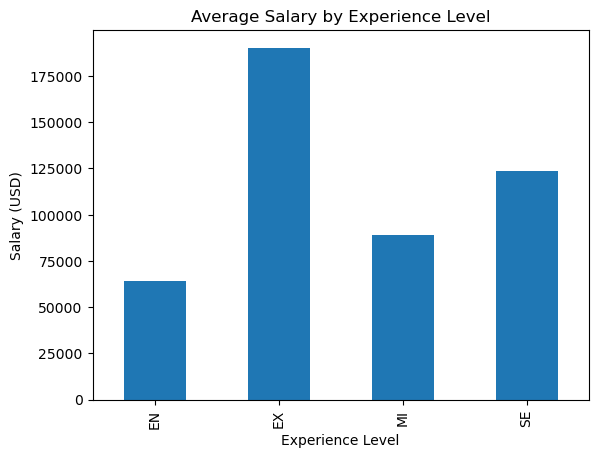

In [333]:
df.groupby("experience_level")["salary_usd"].mean().plot(kind="bar")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

In [334]:
#total jobs in each industry
industry_count = df["industry"].value_counts()
print(industry_count)

industry
Retail                989
Media                 978
Automotive            960
Technology            954
Consulting            947
Real Estate           943
Government            938
Transportation        937
Telecommunications    928
Healthcare            926
Energy                923
Finance               923
Education             902
Gaming                900
Manufacturing         895
Name: count, dtype: int64


In [335]:
#average job description length per job category
avg_desc_length_by_category = df.groupby("job_category")["job_description_length"].mean()
print(avg_desc_length_by_category)

job_category
Analytics      1462.441261
Consulting     1538.048338
Engineering    1497.678132
Management     1503.218705
Other          1521.726902
Science        1505.388325
Specialist     1496.320175
Name: job_description_length, dtype: float64


In [336]:
#how many jobs require a PhD
phd_jobs_count = len(df[df["education_required"] == "PhD"])
print(f"Jobs Requiring PhD: {phd_jobs_count}")

Jobs Requiring PhD: 3420


In [337]:
#average salary by remote ratio
avg_salary_by_remote = df.groupby("remote_ratio")["salary_usd"].mean()
print(avg_salary_by_remote)

remote_ratio
0      115678.025609
50     117440.283355
100    117465.242582
Name: salary_usd, dtype: float64


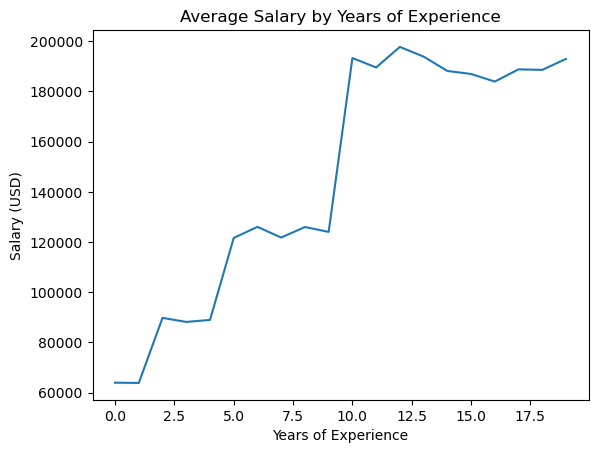

In [338]:
df.groupby("years_experience")["salary_usd"].mean().plot(kind="line")
plt.title("Average Salary by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()

In [339]:
#Top 10 companies offering the most jobs
top_companies = df["company_name"].value_counts().nlargest(10)
print(top_companies)

company_name
TechCorp Inc                  933
Digital Transformation LLC    903
AI Innovations                900
Quantum Computing Inc         896
Cognitive Computing           896
Future Systems                894
Cloud AI Solutions            889
Predictive Systems            881
Smart Analytics               872
Neural Networks Co            872
Name: count, dtype: int64


In [340]:
#Average salary by industry
avg_salary_by_industry = df.groupby("industry")["salary_usd"].mean()
print(avg_salary_by_industry)

industry
Automotive            115564.963542
Consulting            118849.026399
Education             117341.180710
Energy                116456.836403
Finance               116727.957746
Gaming                115472.036667
Government            116644.184435
Healthcare            115322.268898
Manufacturing         117592.871508
Media                 117655.751534
Real Estate           117806.036055
Retail                116608.309403
Technology            117053.314465
Telecommunications    117072.004310
Transportation        116545.572038
Name: salary_usd, dtype: float64


In [341]:
#total jobs by employee residence
residence_count = df["employee_residence"].value_counts()
print(residence_count)

employee_residence
Sweden            776
Germany           765
Denmark           764
France            764
Austria           761
India             758
South Korea       753
Canada            750
China             746
Netherlands       744
United Kingdom    741
Switzerland       739
Singapore         732
Ireland           728
Australia         715
Norway            714
United States     702
Finland           700
Japan             691
Name: count, dtype: int64


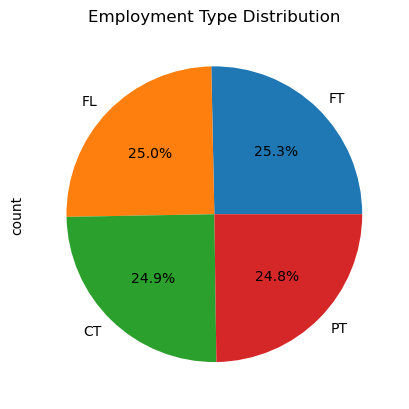

In [342]:
df["employment_type"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Employment Type Distribution")
plt.show()

In [343]:
#Minimum salary in each experience level
min_salary_by_exp = df.groupby("experience_level")["salary_usd"].min()
print(min_salary_by_exp)

experience_level
EN    32519
EX    86560
MI    45900
SE    64824
Name: salary_usd, dtype: int64


In [344]:
#Average years of experience by company location
avg_exp_by_location = df.groupby("company_location")["years_experience"].mean()
print(avg_exp_by_location)

company_location
Australia         6.036212
Austria           6.335099
Canada            6.321004
China             6.064257
Denmark           6.815104
Finland           6.580690
France            6.163588
Germany           6.302122
India             6.112011
Ireland           6.055556
Japan             6.236188
Netherlands       6.217033
Norway            6.403657
Singapore         6.283245
South Korea       6.090523
Sweden            6.276139
Switzerland       5.934871
United Kingdom    6.122563
United States     6.366573
Name: years_experience, dtype: float64


In [345]:
#jobs requiring Python as a skill
python_jobs = len(df[df["required_skills"].str.contains("Python", na=False)])
print(f"Jobs Requiring Python: {python_jobs}")

Jobs Requiring Python: 4151


In [346]:
#Average job description length by company size
avg_desc_by_size = df.groupby("company_size")["job_description_length"].mean()
print(avg_desc_by_size)

company_size
L    1506.393517
M    1506.251117
S    1497.365557
Name: job_description_length, dtype: float64


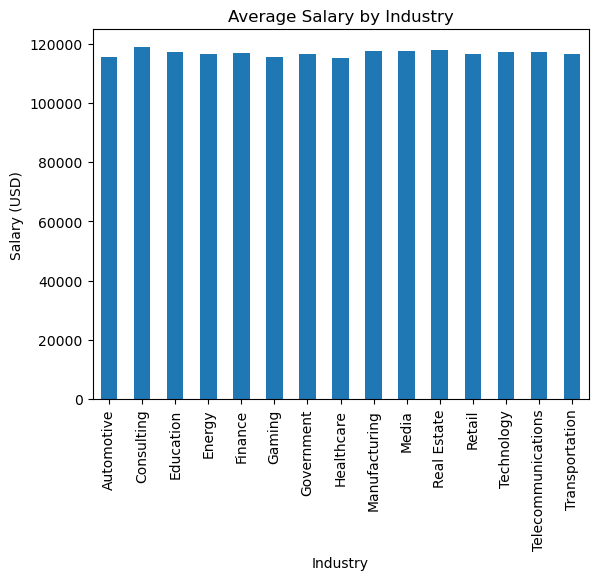

In [347]:
df.groupby("industry")["salary_usd"].mean().plot(kind="bar")
plt.title("Average Salary by Industry")
plt.xlabel("Industry")
plt.ylabel("Salary (USD)")
plt.show()

In [348]:
#Maximum benefits score for each job category
max_benefits_by_category = df.groupby("job_category")["benefits_score"].max()
print(max_benefits_by_category)

job_category
Analytics      10.0
Consulting     10.0
Engineering    10.0
Management     10.0
Other          10.0
Science        10.0
Specialist     10.0
Name: benefits_score, dtype: float64


In [349]:
#average salary for fully remote jobs
avg_remote_salary = df[df["remote_ratio"] == 100]["salary_usd"].mean()
print(f"Avg Salary for Fully Remote: {avg_remote_salary:.2f}")

Avg Salary for Fully Remote: 117465.24


In [350]:
#posting_date to datetime and count jobs posted in 2025
df["posting_date"] = pd.to_datetime(df["posting_date"])
jobs_2025 = len(df[df["posting_date"].dt.year == 2025])
print(f"Jobs Posted in 2025: {jobs_2025}")

Jobs Posted in 2025: 3412


In [351]:
#Average years of experience for jobs paying more than 100K
avg_exp_high_salary = df[df["salary_usd"] > 100000]["years_experience"].mean()
print(f"Avg Experience for Salary > 100K: {avg_exp_high_salary:.2f}")

Avg Experience for Salary > 100K: 9.82


In [352]:
#Top 10 countries (employee residence) by average salary
top_residence_salary = df.groupby("employee_residence")["salary_usd"].mean().nlargest(10)
print(top_residence_salary)

employee_residence
Switzerland       153582.131258
Denmark           151289.712042
Norway            145006.631653
United States     138516.018519
Singapore         124986.124317
Netherlands       124122.331989
United Kingdom    122288.591093
Sweden            121396.645619
Germany           119481.945098
Australia         119109.619580
Name: salary_usd, dtype: float64


In [353]:
#the top 10 highest paying jobs
top_highest_paying = df.sort_values(by="salary_usd", ascending=False).head(10)
print(top_highest_paying[["job_title", "salary_usd", "company_name"]])

                         job_title  salary_usd                company_name
9891   Machine Learning Researcher      399095                TechCorp Inc
2309                  AI Architect      398084              Future Systems
12499        AI Research Scientist      394917  Machine Intelligence Group
12803                AI Specialist      390292              DataVision Ltd
317                 Data Scientist      388754           DeepTech Ventures
5483                  AI Architect      383142              Future Systems
10468           AI Product Manager      381575          Neural Networks Co
9637          AI Software Engineer      379418       Algorithmic Solutions
8377         AI Research Scientist      372206       Quantum Computing Inc
14431        AI Research Scientist      371087              Future Systems


In [354]:
#average benefits score by education level
avg_benefits_by_education = df.groupby("education_required")["benefits_score"].mean()
print(avg_benefits_by_education)

education_required
Associate    7.518840
Bachelor     7.542760
Master       7.477699
PhD          7.471287
Name: benefits_score, dtype: float64


In [355]:
#how many jobs require both Python and SQL
python_sql_jobs = df[df["required_skills"].str.contains("Python", na=False) & 
                     df["required_skills"].str.contains("SQL", na=False)]
print(f"Jobs requiring both Python and SQL: {len(python_sql_jobs)}")


Jobs requiring both Python and SQL: 543


In [356]:
#average salary by education level
avg_salary_by_education = df.groupby("education_required")["salary_usd"].mean()
print(avg_salary_by_education)

education_required
Associate    116135.988172
Bachelor     117264.852667
Master       118479.750921
PhD          115482.582456
Name: salary_usd, dtype: float64


In [357]:
#job titles with the longest descriptions
longest_descriptions = df.sort_values(by="job_description_length", ascending=False).head(10)
print(longest_descriptions[["job_title", "job_description_length"]])


                         job_title  job_description_length
2782   Autonomous Systems Engineer                    2499
12736     Principal Data Scientist                    2499
3331            AI Product Manager                    2499
2054   Machine Learning Researcher                    2499
3386                 AI Consultant                    2499
1123                    Head of AI                    2499
7089                    Head of AI                    2499
1138                    Head of AI                    2498
9939         AI Research Scientist                    2498
9550                 Data Engineer                    2498


In [358]:
#the number of jobs posted per month
df["posting_date"] = pd.to_datetime(df["posting_date"])
jobs_per_month = df["posting_date"].dt.to_period("M").value_counts().sort_index()
print(jobs_per_month)

posting_date
2024-01    889
2024-02    867
2024-03    873
2024-04    924
2024-05    895
2024-06    880
2024-07    906
2024-08    885
2024-09    827
2024-10    894
2024-11    881
2024-12    910
2025-01    897
2025-02    778
2025-03    865
2025-04    872
Freq: M, Name: count, dtype: int64


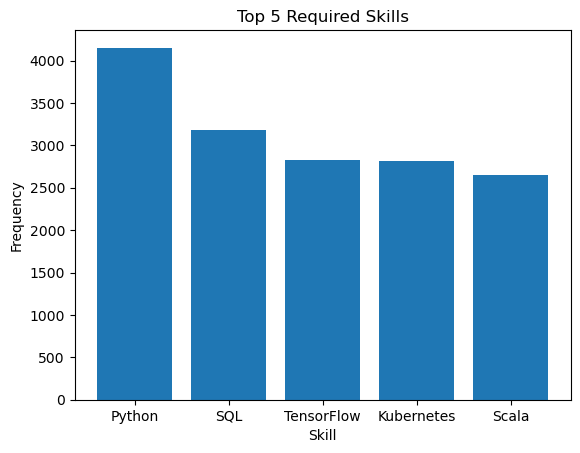

In [359]:
all_skills = df["required_skills"].str.split(", ").sum()
top_skills = Counter(all_skills).most_common(5)
skills, counts = zip(*top_skills)

plt.bar(skills, counts)
plt.title("Top 5 Required Skills")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.show()

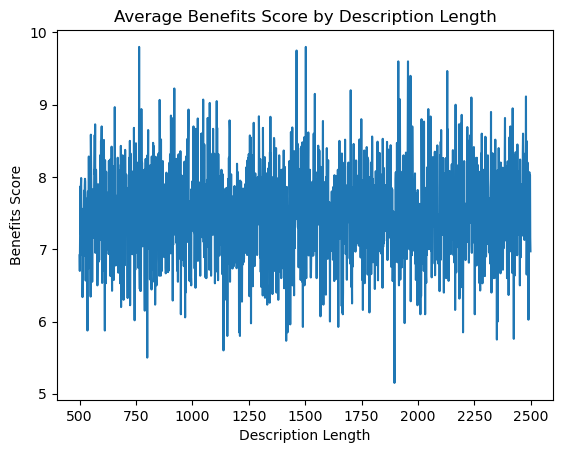

In [360]:
df.groupby("job_description_length")["benefits_score"].mean().plot(kind="line")
plt.title("Average Benefits Score by Description Length")
plt.xlabel("Description Length")
plt.ylabel("Benefits Score")
plt.show()

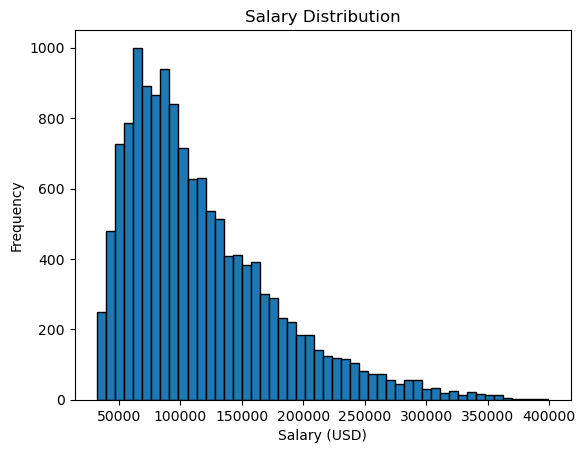

In [361]:
df["salary_usd"].plot(kind="hist", bins=50, edgecolor="black")
plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()